In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [2]:
tf.__version__

'2.0.0'

In [3]:
train_image_path = glob.glob('../dc_2000/train/*/*.jpg')

In [4]:
len(train_image_path)

2000

In [5]:
train_image_path[:5]

['../dc_2000/train/cat/cat.952.jpg',
 '../dc_2000/train/cat/cat.946.jpg',
 '../dc_2000/train/cat/cat.6.jpg',
 '../dc_2000/train/cat/cat.749.jpg',
 '../dc_2000/train/cat/cat.991.jpg']

In [6]:
p = '../dc_2000/train/cat/cat.952.jpg'

In [7]:
int(p.split('/')[-2] == 'cat')

1

In [8]:
train_label = [int(path.split('/')[-2] == 'cat') for path in train_image_path]

In [9]:
train_label[:5]

[1, 1, 1, 1, 1]

In [10]:
def load_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image / 255
    label = tf.reshape(label, [1])
    return image, label

In [11]:
train_label[0]

1

In [12]:
a = tf.reshape(train_label[0], [1])
a.numpy()

array([1], dtype=int32)

In [13]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path, train_label))

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [15]:
train_image_ds = train_image_ds.map(load_preprocess_image, num_parallel_calls=AUTOTUNE)

In [16]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

In [17]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [18]:
train_image_ds = train_image_ds.shuffle(train_count).batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [19]:
imgs, labels = next(iter(train_image_ds))

In [20]:
imgs.shape, labels.shape

(TensorShape([32, 256, 256, 3]), TensorShape([32, 1]))

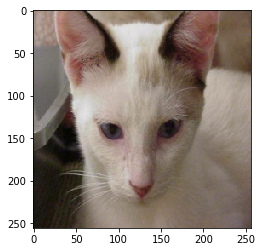

In [21]:
plt.imshow(imgs[0])

In [22]:
labels[0].numpy()

array([1], dtype=int32)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(256,256,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

In [25]:
pred = model(imgs)

In [26]:
pred.shape

TensorShape([32, 1])

In [27]:
np.array([p[0].numpy() for p in  tf.cast(pred > 0, tf.int32)])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
np.array([l[0].numpy() for l in labels])

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)